In [1]:
# 1. Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

# 2. Importing the dataset

In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv',delimiter='|')

In [3]:
raw_df

Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0      https://www.zomato.com/chennai/yaa-mohaideen-b...                                                                                                            
1      https://www.zomato.com/chennai/sukkubhai-biriy...                                                                                                            
2      https://www.zomato.com/chennai/ss-hyderabad-bi...                                                                                                            
3      https://www.zomato.com/chennai/kfc-perambur,KF...                                                                                                            
4      https://www.zomato.com/chennai/tasty-kitchen-p...                                                                                                            
...                                                  ...                                                                                                            
12037  https://www.zomato.com/chennai/cks-sandwiches-...                                                                                                            
12038  https://www.zomato.com/chennai/cks-sandwiches-...                                                                                                            
12039  https://www.zomato.com/chennai/cks-sandwiches-...                                                                                                            
12040  https://www.zomato.com/chennai/cks-sandwiches-...                                                                                                            
12041  https://www.zomato.com/chennai/cks-sandwiches-...                                                                                                            

[12042 rows x 1 columns]

In [4]:
raw_df.head()

Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0  https://www.zomato.com/chennai/yaa-mohaideen-b...                                                                                                            
1  https://www.zomato.com/chennai/sukkubhai-biriy...                                                                                                            
2  https://www.zomato.com/chennai/ss-hyderabad-bi...                                                                                                            
3  https://www.zomato.com/chennai/kfc-perambur,KF...                                                                                                            
4  https://www.zomato.com/chennai/tasty-kitchen-p...

# 3. Getting Basic Information about the Dataset

In [5]:
raw_df.shape

(12042, 1)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12042 entries, 0 to 12041
Data columns (total 1 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                          --------------  ----- 
 0   Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features  12042 non-null  object
dtypes: object(1)
memory usage: 94.2+ KB


The output of raw_df.info() indicates that your dataset is not properly loaded. Specifically:

Observation:

Your DataFrame (raw_df) has only one column instead of the expected multiple columns (e.g., Zomato URL, Name of Restaurant, Address, etc.).
The column name is a single string that combines all the original column names (e.g., "Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,...").
Reason:

This happens when the dataset is improperly loaded, and the separator (e.g., a comma , or tab \t) is not recognized during the import process.
Most likely, the dataset is a CSV file, and the fields are separated by commas. However, the pd.read_csv() function may not have parsed it correctly, resulting in the entire row being read as a single string.
What This Means:

The DataFrame contains 1 column instead of 12 (or however many were expected), and the data in this single column is not split into multiple columns.
The dtypes: object(1) indicates that this single column is stored as an object, which is expected for strings.
How to Fix It: You need to reload the data correctly by specifying the delimiter (separator) used in the CSV file. In most cases, this will be a comma ,.

Steps to Fix:
Reloading the Dataset
Try reloading the dataset with the correct delimiter. If your file is a CSV file and the columns are separated by commas, use:

In [7]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv', sep=',')  # Ensure the correct separator


Check the Data After Reloading:

In [8]:
print(raw_df.info())  # This should now show multiple columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  int64  
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.1+ MB
None


print(raw_df.head())  # Preview the first few rows

The output of `raw_df.info()` indicates that your dataset has been successfully loaded with the correct column structure and data types. Here's a breakdown of the key details from the output:

### Key Observations:

#### Number of Rows and Columns:
- The dataset contains **12,032 rows** and **12 columns**.

#### Column Information:
- **Zomato URL:** Non-null, `object` (string type). Represents the URL of the restaurant's Zomato page.
- **Name of Restaurant:** Non-null, `object`. Contains the names of the restaurants.
- **Address:** Non-null, `object`. Full addresses of the restaurants.
- **Location:** Non-null, `object`. The specific area/location of the restaurants.
- **Cuisine:** Non-null, `object`. The types of cuisine offered by the restaurants.
- **Top Dishes:** Non-null, `object`. Lists of the most popular dishes served.
- **Price for 2:** Non-null, `int64`. The average cost for two people in the restaurant.
- **Dining Rating:** `float64`, has **6,681 non-null values**, meaning **5,351 rows are missing this data**.
- **Dining Rating Count:** `object`, has **11,812 non-null values**, meaning **220 rows are missing this data**. Note: Since it is an object type, you may need to convert it to numerical data if necessary.
- **Delivery Rating:** `float64`, has **6,181 non-null values**, meaning **5,851 rows are missing this data**.
- **Delivery Rating Count:** `object`, has **11,812 non-null values**, meaning **220 rows are missing this data**.
- **Features:** Non-null, `object`. Represents additional features of the restaurant (e.g., "Outdoor Seating", "Live Music").

#### Missing Data:
- There are missing values in **Dining Rating**, **Dining Rating Count**, **Delivery Rating**, and **Delivery Rating Count**. These missing values should be handled as part of the data cleaning process.

#### Memory Usage:
- The dataset is using approximately **1.1 MB of memory**.


# 4. Cleaning the Dataset

### Next Steps:

#### 1. Handle Missing Data:
You need to decide how to handle the missing values in columns like **Dining Rating**, **Dining Rating Count**, **Delivery Rating**, and **Delivery Rating Count**. Possible approaches include:

- **Fill missing values** with a default value:
  - Use `0`, the **mean**, or the **median** of the column to replace missing values.
- **Remove rows** with missing values:
  - Eliminate rows containing NaN values if they are not critical for analysis.
- Use **advanced techniques** like:
  - Interpolation or predictive modeling to estimate and fill the missing values intelligently.


In [9]:
# Fill missing values with a default value (e.g., 0 for numeric data)

raw_df['Dining Rating'].fillna(0, inplace=True)
raw_df['Delivery Rating'].fillna(0, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_11672\2636019203.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\dell\AppData\Local\Temp\ipykernel_11672\2636019203.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

#### 2. Convert Object Columns to Appropriate Types:
- Columns like **Dining Rating Count** and **Delivery Rating Count** are currently stored as `object` (string) but should likely be converted to numerical types if they represent counts.


In [10]:
raw_df['Dining Rating Count'] = pd.to_numeric(raw_df['Dining Rating Count'], errors='coerce')
raw_df['Delivery Rating Count'] = pd.to_numeric(raw_df['Delivery Rating Count'], errors='coerce')


#### 3. Check for Duplicates:
- Even if rows are not exact duplicates, you may want to check for duplicate restaurants based on specific columns, such as **Name of Restaurant** and **Address**.


In [11]:
duplicate_rows = raw_df.duplicated(subset=['Name of Restaurant', 'Address'])
print(raw_df[duplicate_rows])


                                              Zomato URL Name of Restaurant  \
3670   https://www.zomato.com/chennai/big-paratha-hou...  Big Paratha House   
4973   https://www.zomato.com/chennai/hotel-srivatsan...    Hotel Srivatsan   
6960   https://www.zomato.com/chennai/cake-maker-choo...         Cake Maker   
7767   https://www.zomato.com/chennai/fresh-juice-bar...    Fresh Juice Bar   
8105   https://www.zomato.com/chennai/biryani-paradis...   Biryani Paradise   
...                                                  ...                ...   
12027  https://www.zomato.com/chennai/cks-sandwiches-...    CK's Sandwiches   
12028  https://www.zomato.com/chennai/cks-sandwiches-...    CK's Sandwiches   
12029  https://www.zomato.com/chennai/cks-sandwiches-...    CK's Sandwiches   
12030  https://www.zomato.com/chennai/cks-sandwiches-...    CK's Sandwiches   
12031  https://www.zomato.com/chennai/cks-sandwiches-...    CK's Sandwiches   

                                                 Ad

The output of the provided code indicates that there are **183 rows** in your dataset where the combination of values in the columns **Name of Restaurant** and **Address** are duplicates. Here's what it means and what you can infer from this:


### Logic of the Code: Duplicate Detection

```python
raw_df.duplicated(subset=['Name of Restaurant', 'Address'])


### 1) Duplicate Detection Logic

This checks for duplicate rows based only on the `Name of Restaurant` and `Address` columns. It returns a **Boolean Series** where:

- **True** represents rows that are duplicates (excluding the first occurrence of each duplicate).
- **False** represents unique rows.




### 2. Filtering the Duplicate Rows:

```python
raw_df[duplicate_rows]


Filters the original DataFrame to include only the rows identified as duplicates by the duplicated() method.

Output:
The result is a DataFrame containing all duplicate entries (excluding the first occurrence for each duplicate combination) in the dataset based on the specified subset of columns (Name of Restaurant and Address).

Key Observations:
1) Duplicate Rows:

There are 183 duplicate rows in the dataset.

These rows have the same values in the Name of Restaurant and Address columns.

2) Redundant Data:

Some restaurants, such as "CK's Sandwiches," have multiple rows with the same Name of Restaurant and Address.

These rows might differ in other columns, such as Cuisine, Price for 2, Ratings, etc.

3) Possible Causes of Duplicates:

Data entry errors.

Multiple entries for the same restaurant due to differences in delivery vs. dining ratings or features.

Next Steps:

1) Verify the Duplicates:

Examine these rows carefully to confirm if they are truly redundant or represent valid distinct entries (e.g., same restaurant with different service features).

2) Remove Duplicates:

If these rows are deemed redundant, you can remove them using:

```python
raw_df = raw_df.drop_duplicates(subset=['Name of Restaurant', 'Address'])



In [12]:
raw_df = raw_df.drop_duplicates(subset=['Name of Restaurant', 'Address'])


This will keep the first occurrence of each duplicate and remove the rest.

3) Consider Other Columns:

If necessary, extend the subset to include more columns (e.g., Cuisine, Features) to ensure duplicates are identified more accurately. 

For example:

In [13]:
duplicate_rows = raw_df.duplicated(subset=['Name of Restaurant', 'Address', 'Cuisine'])


4 ) Document the Changes:

After handling duplicates, document how many rows were removed and verify the integrity of the dataset. 

Use raw_df.info() to check the updated number of rows.

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11849 entries, 0 to 12019
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             11849 non-null  object 
 1   Name of Restaurant     11849 non-null  object 
 2   Address                11849 non-null  object 
 3   Location               11849 non-null  object 
 4   Cuisine                11849 non-null  object 
 5   Top Dishes             11849 non-null  object 
 6   Price for 2            11849 non-null  int64  
 7   Dining Rating          11849 non-null  float64
 8   Dining Rating Count    6672 non-null   float64
 9   Delivery Rating        11849 non-null  float64
 10  Delivery Rating Count  6099 non-null   float64
 11  Features               11849 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


### Output of `raw_df.info()` after Removing Duplicates

The output indicates the following:

#### Key Observations:

- **Number of Rows:**
  - The dataset now has 11,849 rows (previously 12,042). This suggests that 193 rows were removed as duplicates.
  - The dataset has reduced by 193 rows, which were identified and removed based on the columns `Name of Restaurant` and `Address` (and potentially other columns, depending on the subset you used).

- **Non-Null Count:**
  - The non-null count for most columns (e.g., Zomato URL, Name of Restaurant, Address, etc.) is now 11,849, indicating no missing values in those columns.
  - However, some columns, such as `Dining Rating Count`, `Delivery Rating Count`, etc., still have missing values. This means some restaurants don't have a rating or count for dining or delivery.

- **Column Data Types:**
  - `Price for 2`, `Dining Rating`, and `Delivery Rating` are still numerical columns (`int64` and `float64`), while `Zomato URL`, `Name of Restaurant`, etc., are object (string) type columns.


### What This Means:

- **Duplicate Removal:** 
  - The dataset now has fewer rows because duplicate rows based on the restaurant's `Name` and `Address` were removed. This improves the accuracy and integrity of your dataset.

- **Missing Data:**
  - While duplicates are removed, some columns (e.g., `Dining Rating Count` and `Delivery Rating Count`) still have missing data. You will need to address these gaps next.


In [15]:
# Checking for Null records

raw_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating               0
Dining Rating Count      5177
Delivery Rating             0
Delivery Rating Count    5750
Features                    0
dtype: int64

### Next Steps:

#### Handle Missing Data:

As `Dining Rating Count` and `Delivery Rating Count` still have missing values, you need to decide how to handle them. Possible approaches:
- **Fill missing values** with a default value (e.g., 0 or mean/median of the column).
- **Remove rows** with missing values if they are critical to your analysis.
- **Use imputation techniques** to predict missing values based on other data.


In [16]:
# Checking for a null row

raw_df[raw_df['Name of Restaurant'].isnull()]

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [17]:
raw_df[raw_df['Address'].isnull()]

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [18]:
raw_df[raw_df['Location'].isnull()]

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [19]:
raw_df[raw_df['Dining Rating Count'].isnull()]

Zomato URL  \
6      https://www.zomato.com/chennai/bai-veetu-kalya...   
77     https://www.zomato.com/chennai/al-dhareeq-beef...   
106    https://www.zomato.com/chennai/twilight-take-o...   
107    https://www.zomato.com/chennai/the-red-box-ann...   
114    https://www.zomato.com/chennai/charminar-biriy...   
...                                                  ...   
12007     https://www.zomato.com/chennai/inlayers-egmore   
12008  https://www.zomato.com/chennai/inlayers-kodamb...   
12009  https://www.zomato.com/chennai/inlayers-ashok-...   
12010  https://www.zomato.com/chennai/inlayers-ekkadu...   
12019  https://www.zomato.com/chennai/cks-sandwiches-...   

              Name of Restaurant  \
6             Bai Veetu Kalyanam   
77      Al Dhareeq Beef Biriyani   
106            Twilight Take Out   
107                  The Red Box   
114    Charminar Biriyani Centre   
...                          ...   
12007                   Inlayers   
12008                   Inlayers   
12009                   Inlayers   
12010                   Inlayers   
12019            CK's Sandwiches   

                                                 Address         Location  \
6               1/187, Thalambur Road, Navallur, Chennai         Navallur   
77      64/A, 162, Sivan Kovil South Street, Kodambak...      Kodambakkam   
106     1, Park Side Street, Lake Area, Nungambakkam,...     Nungambakkam   
107     Flat 51/C, Shanthi Colony Main Road, Anna Nag...  Anna Nagar West   
114     91, Dr. Besant Road, Near Meesapet Market, Ro...       Royapettah   
...                                                  ...              ...   
12007   150/28, 2/38, Cisons Complex, Montieth Road, ...           Egmore   
12008   18, Shop 1, Ground Floor, Station View Road, ...      Kodambakkam   
12009   New 86, Old 72, Ground Floor, 4th Avenue, Ash...      Ashok Nagar   
12010   21/10, Rajeswari Tower, Bungalow, 1st Street,...    Ekkaduthangal   
12019                                      Delivery Only      Maduravoyal   

                                                 Cuisine  \
6                                            ['Biryani']   
77                                           ['Biryani']   
106    ['North Indian', ' Chinese', ' Rolls', ' Conti...   
107                                          ['Chinese']   
114                         ['Biryani', ' North Indian']   
...                                                  ...   
12007                            ['Bakery', ' Desserts']   
12008                            ['Bakery', ' Desserts']   
12009                            ['Bakery', ' Desserts']   
12010                            ['Bakery', ' Desserts']   
12019                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
6      ['Bread Halwa', ' Mutton Biryani', ' Brinjal G...          350   
77                                      ['Beef Biryani']          300   
106    ['Club Sandwich', ' Chicken Tikka Roll', ' Chi...          350   
107    ['Noodle', ' Chilli Chicken Gravy', ' Dragon C...          200   
114    ['Chicken Biryani', ' Bread Halwa', ' Brinjal ...          300   
...                                                  ...          ...   
12007                                            Invalid          700   
12008                                            Invalid          700   
12009                                            Invalid          700   
12010                                            Invalid          700   
12019                                            Invalid          350   

       Dining Rating  Dining Rating Count  Delivery Rating  \
6                0.0                  NaN              4.3   
77               0.0                  NaN              3.9   
106              0.0                  NaN              4.0   
107              0.0                  NaN              4.2   
114              0.0                  NaN              3.9 

In [20]:
raw_df[raw_df['Delivery Rating Count'].isnull()]

Zomato URL  \
15     https://www.zomato.com/chennai/welcome-hotel-p...   
18     https://www.zomato.com/chennai/wire-room-bar-k...   
23       https://www.zomato.com/chennai/bff-2-0-ra-puram   
85     https://www.zomato.com/chennai/bazaar-all-day-...   
89     https://www.zomato.com/chennai/coal-barbecues-...   
...                                                  ...   
12007     https://www.zomato.com/chennai/inlayers-egmore   
12008  https://www.zomato.com/chennai/inlayers-kodamb...   
12009  https://www.zomato.com/chennai/inlayers-ashok-...   
12010  https://www.zomato.com/chennai/inlayers-ekkadu...   
12019  https://www.zomato.com/chennai/cks-sandwiches-...   

                                 Name of Restaurant  \
15                                    Welcome Hotel   
18                          Wire Room Bar & Kitchen   
23                                          BFF 2.0   
85     Bazaar - All Day Diner - Grand by GRT Hotels   
89                                   Coal Barbecues   
...                                             ...   
12007                                      Inlayers   
12008                                      Inlayers   
12009                                      Inlayers   
12010                                      Inlayers   
12019                               CK's Sandwiches   

                                                 Address  \
15      112/241, Purasawalkam High Road, Purasavakkam...   
18      142, Phoenix Marketcity, New NGO Colony, Vela...   
23               80/29, 2nd Main Road, RA Puram, Chennai   
85      Grand by GRT Hotels, 120, Sir Thyagaraya Road...   
89      Shop 17 & 18, Rajalakshmi Nagar, 7th Cross St...   
...                                                  ...   
12007   150/28, 2/38, Cisons Complex, Montieth Road, ...   
12008   18, Shop 1, Ground Floor, Station View Road, ...   
12009   New 86, Old 72, Ground Floor, 4th Avenue, Ash...   
12010   21/10, Rajeswari Tower, Bungalow, 1st Street,...   
12019                                      Delivery Only   

                             Location  \
15                       Purasavakkam   
18     Phoenix Market City, Velachery   
23                           RA Puram   
85                Grand by GRT Hotels   
89                          Velachery   
...                               ...   
12007                          Egmore   
12008                     Kodambakkam   
12009                     Ashok Nagar   
12010                   Ekkaduthangal   
12019                     Maduravoyal   

                                                 Cuisine  \
15           ['South Indian', ' Desserts', ' Beverages']   
18                             ['Continental', ' Asian']   
23          ['North Indian', ' Continental', ' Italian']   
85     ['North Indian', ' South Indian', ' Continenta...   
89                          ['North Indian', ' Chinese']   
...                                                  ...   
12007                            ['Bakery', ' Desserts']   
12008                            ['Bakery', ' Desserts']   
12009                            ['Bakery', ' Desserts']   
12010                            ['Bakery', ' Desserts']   
12019                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
15     ['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...          300   
18     ['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...         2000   
23     ['Crispy Chicken', ' Cocktails', ' Pizza', ' N...         1500   
85     ['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...         2500   
89     ['Chicken Honey', ' Fish', ' Prawn', ' Waffles...         1400   
...                                                  ...          ...   
12007                                            Invalid          700   
12008                                            Invalid          700   
12009                                            Invalid          700   

In [21]:
# Fill missing values with 0 for Dining and Delivery Rating Count

raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].fillna(0)
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].fillna(0)

In [22]:
# Calculate the mean or median
dining_mean = raw_df['Dining Rating Count'].mean()
delivery_mean = raw_df['Delivery Rating Count'].mean()

In [23]:
# Fill missing values with the calculated mean
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].fillna(dining_mean)
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].fillna(delivery_mean)

In [24]:
print(raw_df.isnull().sum())  # Ensure no missing values remain


Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64


In [25]:
# Finding all the duplicate rows

raw_df[raw_df.duplicated()]

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [ ]:
# The above output indicates that there are no duplicate rows available.


## 4. Copying the cleaned data into a new DataFrame

In [26]:
zomato_df = raw_df.copy()

In [27]:
zomato_df.head()

Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...          500   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...         1000   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...          500   
3                                  ['Zinger Burger']          500   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...          450   

   Dining Rating  Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0            4.3               1500.0              4.3                 9306.0   
1            4.4               3059.0              4.1                39200.0   
2            4.3               1361.0              4.4                10500.0   
3            4.0               1101.0              4.0                11200.0   
4            4.2                617.0              4.1                22400.0   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

# 5. Performing Exploratory Data Analysis

### Q1) How many restaurants are in Chennai for each type of cuisine?

In [28]:
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',
 title= 'No. of Restaurants by Cuisine Type',
 labels={'CUSINE TYPE':'Cuisine Type'})
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine', 'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count', 'Delivery Rating', 'Delivery Rating Count', 'Features'] but received: CUSINE TYPE

In [ ]:
# The error means that the column CUSINE TYPE does not exist in your dataset. 

#The column names in your dataset are:

#['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine', 'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count', 'Delivery Rating', 'Delivery Rating Count', 'Features']


In [ ]:
# Why the Error Occurs:

#The column name you are using (CUSINE TYPE) does not match any of the columns in your dataset. 
#Instead, the dataset has a column named Cuisine. This mismatch causes the ValueError.

# Solution:
# To fix the issue, use the correct column name from your dataset. In this case, replace CUSINE TYPE with Cuisine in your code:




In [29]:
import plotly.express as px

fig = px.histogram(
    raw_df,  # Replace zomato_df with the correct DataFrame name if needed
    x='Cuisine',  # Correct column name
    color='Cuisine',
    title='No. of Restaurants by Cuisine Type',
    labels={'Cuisine': 'Cuisine Type'}
)
fig.show()


In [ ]:
### The above output graph is not showing the details properly.

# If the histogram does not display the graph clearly, 
# it may be due to a large number of unique values in the Cuisine column or the presence of values with excessive text length. 
#Here are some steps to improve the visualization:

In [ ]:
# Steps to Avoid Similar Errors:

# Check Column Names Before Using Them: Always inspect the column names in your DataFrame using: print(raw_df.columns)

In [30]:
print(raw_df.columns)


Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')


In [ ]:
# Ensure Consistent Naming: If column names are inconsistent or not clear, you can rename them for easier use:

In [31]:
raw_df.rename(columns={'Cuisine': 'Cuisine Type'}, inplace=True)


In [ ]:
# If the histogram does not display the graph clearly, 
# it may be due to a large number of unique values in the Cuisine column or the presence of values with excessive text length. 
#H ere are some steps to improve the visualization:

In [ ]:
# 1. Analyze the Cuisine Column

# Before plotting, inspect the column for its contents:

In [33]:
print(raw_df['Cuisine Type'].value_counts())


Cuisine Type
['South Indian']                                                             881
['Fast Food']                                                                294
['Bakery']                                                                   254
['South Indian', ' Chinese']                                                 232
['Biryani']                                                                  225
                                                                            ... 
['Andhra', ' Chinese', ' North Indian', ' South Indian']                       1
['Desserts', ' Street Food']                                                   1
['Chettinad', ' South Indian', ' Street Food']                                 1
['South Indian', ' North Indian', ' Chinese', ' Seafood', ' Street Food']      1
['Kerala', ' Chettinad', ' Biryani']                                           1
Name: count, Length: 2423, dtype: int64


In [ ]:
# This will help identify whether there are too many unique cuisines or if they need grouping.

In [ ]:
# The output of the code : print(raw_df['Cuisine Type'].value_counts()) 

# shows the counts of unique values in the Cuisine Type column, arranged in descending order. 

# Here's what this means and the next steps:


What It Means:

1) Unique Cuisine Combinations:

Each unique combination of cuisines, such as ['South Indian'] or ['South Indian', ' Chinese'], is treated as a separate category.
For example, ['South Indian'] appears 881 times, while ['South Indian', ' Chinese'] appears 232 times.

2)High Number of Unique Categories:

There are 2423 unique combinations of cuisine types, making the data difficult to visualize and analyze directly due to its granularity.

3)Potential Redundancy:

Some combinations may represent similar cuisines but differ slightly due to formatting or ordering, e.g., ['Chinese', ' South Indian'] and ['South Indian', ' Chinese'].

### Next Steps:

**To make this column more manageable, you can:**

1. **Clean and Normalize the Data:**
   - Remove extra whitespace or inconsistent formatting.
   - Split the combinations into individual cuisines for easier analysis.

2. **Simplify the Analysis:**
   - Focus on the most frequent cuisines or combinations.
   - Group cuisines into broader categories if necessary.

3. **Split or Flatten the Column:**
   - Convert lists of cuisines into individual rows or a simplified structure.


In [ ]:
# Step 1: Normalize the Data

# Normalize the cuisine type values by removing extra whitespace and sorting the items alphabetically within the lists:



In [36]:
raw_df['Cuisine Type'] = raw_df['Cuisine Type'].apply(
    lambda x: ', '.join(sorted([c.strip() for c in eval(x)])) if isinstance(x, str) else x
)


In [ ]:
# Step 2: Analyze Simplified Cuisine Types

# Re-check the value counts to see the simplified categories:

In [37]:
print(raw_df['Cuisine Type'].value_counts())


Cuisine Type
South Indian                                                                               881
Chinese, North Indian, South Indian                                                        307
Beverages, Fast Food                                                                       305
Fast Food                                                                                  294
Chinese, South Indian                                                                      287
                                                                                          ... 
Healthy Food, Juices, Salad                                                                  1
Bakery, Beverages, Desserts, Fast Food, Ice Cream                                            1
Beverages, Biryani, Chettinad, Continental, Desserts, Kebab, North Indian, South Indian      1
Chinese, Continental, North Indian, Seafood                                                  1
Biryani, Chettinad, Kerala           

In [ ]:
# Step 3: Focus on Top Cuisines

# Identify the most frequent cuisines:

In [38]:
top_cuisines = raw_df['Cuisine Type'].value_counts().head(10)
print(top_cuisines)


Cuisine Type
South Indian                           881
Chinese, North Indian, South Indian    307
Beverages, Fast Food                   305
Fast Food                              294
Chinese, South Indian                  287
Chinese, North Indian                  276
Bakery                                 254
Biryani                                225
Chinese                                199
North Indian                           187
Name: count, dtype: int64


In [ ]:
# Step 4: Visualize the Top Cuisines

# Filter the DataFrame to include only the top cuisines and visualize:

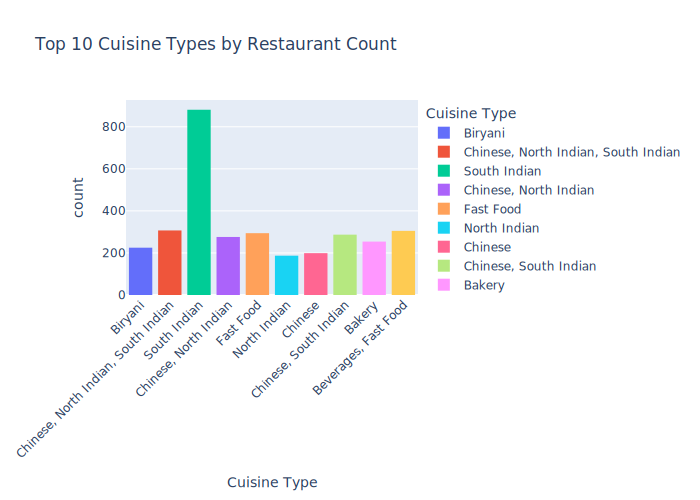

In [39]:
filtered_df = raw_df[raw_df['Cuisine Type'].isin(top_cuisines.index)]

import plotly.express as px

fig = px.histogram(
    filtered_df,
    x='Cuisine Type',
    color='Cuisine Type',
    title='Top 10 Cuisine Types by Restaurant Count',
    labels={'Cuisine Type': 'Cuisine Type'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Q2) What are the percentage of restaurants by Rating Type in Chennai?¶

In [40]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

KeyError: 'RATING_TYPE'

In [ ]:
# Verify Column Names: Check all the column names in the DataFrame to confirm the actual name: print(zomato_df.columns)


In [41]:
print(zomato_df.columns)


Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features'],
      dtype='object')


In [ ]:
# The output of zomato_df.columns confirms that there is no column named RATING_TYPE in your DataFrame. 

# Here's how to address the issue:

In [ ]:
# Why You See the Error:

# The column RATING_TYPE does not exist in your dataset. This could be because:

# You are trying to access a column that hasn’t been created yet.

# You are using the wrong column name.


In [ ]:
#What to Do:

# 1. Identify the Purpose of RATING_TYPE:

# Is RATING_TYPE supposed to represent an existing column?

# Or, is it a derived column (e.g., a classification based on ratings)?

In [ ]:
# 2. Derive the RATING_TYPE Column:

# If it’s a derived column, you need to create it. 

# For example, you might categorize restaurants based on their Dining Rating or Delivery Rating.

In [ ]:
# Example: Creating RATING_TYPE

#You could create a RATING_TYPE column based on average ratings or some threshold values:

In [42]:
# Example: Categorize restaurants based on their average rating

zomato_df['RATING_TYPE'] = zomato_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)

# Categorize into High, Medium, and Low rating types

zomato_df['RATING_TYPE'] = pd.cut(
    zomato_df['RATING_TYPE'],
    bins=[0, 2.5, 4.0, 5.0],  # Define rating ranges
    labels=['Low', 'Medium', 'High']  # Assign labels
)


In [ ]:
# 3. Run Your Analysis Again:

# Now that you have a RATING_TYPE column, you can proceed with your original code:

In [44]:
rating_type_df = zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

COUNT OF RESTAURANTS  count
0                  Low   4031
1               Medium   3826
2                 High    538

In [45]:
fig = px.pie(rating_type_df, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE',
 title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['COUNT OF RESTAURANTS', 'count'] but received: RATING TYPE

In [ ]:
# The error indicates that the column name 'RATING TYPE' specified in the names argument does not exist in the rating_type_df DataFrame.

# According to the error message, the DataFrame contains columns ['COUNT OF RESTAURANTS', 'count'].

To resolve the issue:

 1) Verify Column Names

 Check the column names in rating_type_df

In [46]:
print(rating_type_df.columns)

Index(['COUNT OF RESTAURANTS', 'count'], dtype='object')


2) Correct Column Name

Update the column name or use the correct name in the code

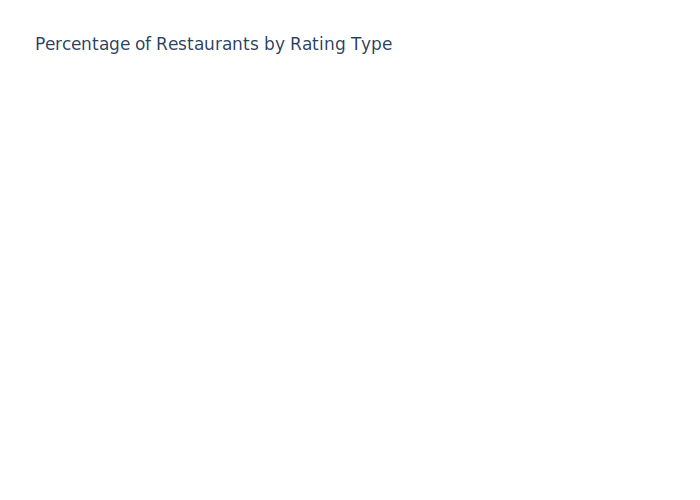

In [47]:
fig = px.pie(
    rating_type_df, 
    names='count',  # Use the correct column name
    values='COUNT OF RESTAURANTS', 
    color='count',
    title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

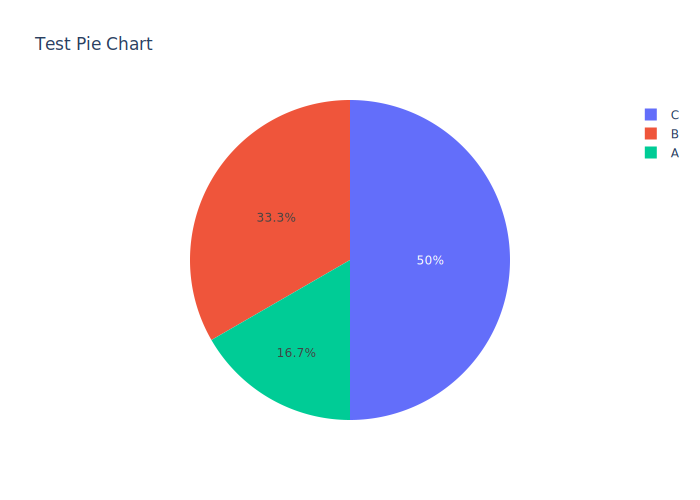

In [49]:
# Here, we are using this, since for the above code, the pie chart is not coming, so check whether the issue with the above code or ploltly(pie chart).

# We use this sample code, and it also has given us the output with pie chart, so the issue is with the above code.


import pandas as pd
import plotly.express as px

test_df = pd.DataFrame({
    'count': ['A', 'B', 'C'],
    'COUNT OF RESTAURANTS': [100, 200, 300]
})

fig = px.pie(
    test_df, 
    names='count', 
    values='COUNT OF RESTAURANTS', 
    title='Test Pie Chart'
)
fig.show()

In [ ]:
# We need to fix the code:

# If your pie chart is appearing blank, the issue might be related to the content or structure of the rating_type_df DataFrame, 
# or possibly a mismatch between the specified columns and their content. Here are steps to troubleshoot and resolve the issue:


In [ ]:
# 1. Check for Data

# Ensure rating_type_df has valid, non-empty data for the specified columns ('count' and 'COUNT OF RESTAURANTS'):

In [50]:
print(rating_type_df.head())
print(rating_type_df[['count', 'COUNT OF RESTAURANTS']].dropna())


  COUNT OF RESTAURANTS  count
0                  Low   4031
1               Medium   3826
2                 High    538
   count COUNT OF RESTAURANTS
0   4031                  Low
1   3826               Medium
2    538                 High


The issue seems to stem from your dataset having mismatched column assignments or duplication of headers. Specifically, you have the following columns:

COUNT OF RESTAURANTS: Contains values like "Average", "Good", etc. (likely categorical). count: Contains numerical values like 4031, 3826, etc.

To correctly plot your pie chart, we need to fix these discrepancies by ensuring proper column naming and alignment. Here's how you can proceed:

Steps to Fix

1) Rename Columns for Clarity Rename your columns to make their purpose clear:

In [51]:
rating_type_df.columns = ['RATING TYPE', 'COUNT OF RESTAURANTS']

2) Check Data Alignment Verify that RATING TYPE (categorical) and COUNT OF RESTAURANTS (numerical) align correctly:

In [52]:
print(rating_type_df.head())

  RATING TYPE  COUNT OF RESTAURANTS
0         Low                  4031
1      Medium                  3826
2        High                   538


3) Plot the Pie Chart Now plot your chart with correctly aligned columns:

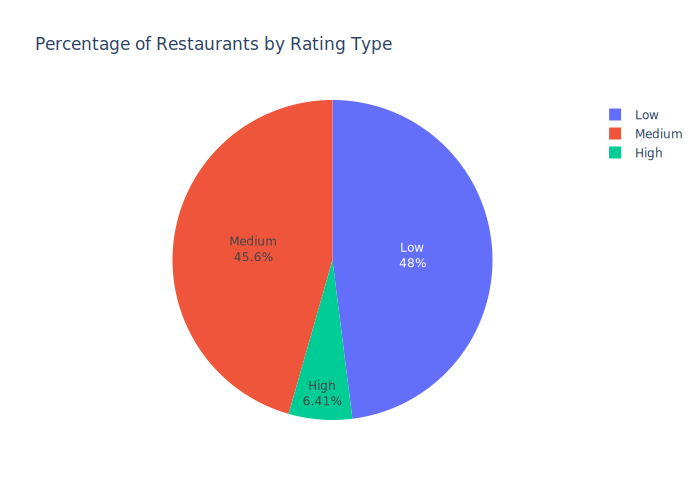

In [53]:
import plotly.express as px

fig = px.pie(
    rating_type_df, 
    names='RATING TYPE', 
    values='COUNT OF RESTAURANTS', 
    title='Percentage of Restaurants by Rating Type'
).update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Why the Issue Occurred Your initial column headers (count and COUNT OF RESTAURANTS) might have been flipped or duplicated during data manipulation. 

    Plotly couldn’t match the expected categorical column (names) with the values column (values) because of the mismatch.

Expected Output This should render a pie chart where:

Slices represent different RATING TYPE values (e.g., Average, Good, etc.). Sizes are proportional to the COUNT OF RESTAURANTS for each RATING TYPE.

### Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [54]:
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

KeyError: 'CUSINE_CATEGORY'

In [55]:
# Check for Missing Values in Dining Rating:

print(zomato_df['Dining Rating'].isnull().sum())


0


In [56]:
# Check for Seafood in the Cuisine Column:

print(zomato_df[zomato_df['Cuisine'].str.contains('Seafood', case=False, na=False)])


                                              Zomato URL  \
14     https://www.zomato.com/chennai/hotel-paramount...   
17          https://www.zomato.com/chennai/abids-chetpet   
25     https://www.zomato.com/chennai/salem-rr-briyan...   
49     https://www.zomato.com/chennai/sea-emperor-mad...   
53     https://www.zomato.com/chennai/copper-kitchen-...   
...                                                  ...   
9623   https://www.zomato.com/chennai/anjappar-1-pall...   
9624   https://www.zomato.com/chennai/anjappar-1-poon...   
10113  https://www.zomato.com/chennai/little-hut-anna...   
10114  https://www.zomato.com/chennai/little-hut-anna...   
10226  https://www.zomato.com/chennai/aazhi-the-sea-f...   

              Name of Restaurant  \
14               Hotel Paramount   
17                        Abid's   
25     Salem RR Briyani Unavagam   
49                   Sea Emperor   
53                Copper Kitchen   
...                          ...   
9623                    Anj

In [58]:
# Filter for Seafood restaurants

seafood_restaurants = zomato_df[zomato_df['Cuisine'].str.contains('Seafood', case=False, na=False)]

In [59]:
# Sort by Dining Rating in descending order

top_seafood_restaurants = seafood_restaurants.sort_values(by='Dining Rating', ascending=False)

In [60]:
# Display the top 10 highest-rated Seafood restaurants

print(top_seafood_restaurants[['Name of Restaurant', 'Location', 'Dining Rating', 'Cuisine']].head(10))

                                Name of Restaurant  \
195                                     The Marina   
292                           Alchemy Bar & Lounge   
214              Sera - The Tapas Bar & Restaurant   
315                                        Layalee   
342                                  L'attitude 49   
96                                   Urban Spatula   
282   Bay View - Taj Fisherman's Cove Resort & Spa   
358        The Wharf 2.0 - Radisson BLU  Templebay   
64                                           Samco   
9028                                Copper Kitchen   

                                               Location  Dining Rating  \
195                                        Nungambakkam            4.8   
292                             Hotel Rajpark, Alwarpet            4.5   
214                                         Gopalapuram            4.5   
315                                       Ekkaduthangal            4.4   
342                                

In [ ]:
# str.contains('Seafood', case=False, na=False): Filters rows where the Cuisine column contains the word "Seafood" (case-insensitive). 

# The na=False handles potential NaN values, though you don't have any in this dataset.

# sort_values(by='Dining Rating', ascending=False): Sorts the filtered DataFrame in descending order of the Dining Rating.

# .head(10): Retrieves the top 10 rows.

### Q4) Which is the best Food Truck in Chennai?

In [66]:
foodtruck_df = zomato_df[zomato_df['Cuisine'] == 'Food Truck']
foodtruck_df.sort_values(by='RATING_TYPE',ascending=False).head(2)

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features, RATING_TYPE]
Index: []

In [ ]:
# The output you’re seeing, which displays only the column headings and no data, 

# indicates that the foodtruck_df DataFrame is empty after applying the filter zomato_df[zomato_df['Cuisine'] == 'Food Truck']. 

# This happens when there are no rows in the dataset where the Cuisine column has an exact match to the string 'Food Truck'.

In [ ]:
# Reasons and Solution:

#Check for Exact Matches:
# The == operator looks for an exact match. 
# If 'Food Truck' does not exist as a standalone value in the Cuisine column, no rows will satisfy the condition.

# Check for Partial Matches: 
# If 'Food Truck' might appear as part of a list or a string (e.g., ['Food Truck', 'Fast Food']), use the str.contains method instead.

In [67]:
# Use the following code to search for partial matches:

# Filter for rows where 'Food Truck' is in the Cuisine column
foodtruck_df = zomato_df[zomato_df['Cuisine'].str.contains('Food Truck', case=False, na=False)]

# Check if any rows match
if not foodtruck_df.empty:
    # Sort by the desired rating type and get the top result
    best_food_truck = foodtruck_df.sort_values(by='Dining Rating', ascending=False).head(2)
    print(best_food_truck[['Name of Restaurant', 'Location', 'Cuisine', 'Dining Rating']])
else:
    print("No Food Truck data available in the dataset.")


No Food Truck data available in the dataset.


In [ ]:
# Key Adjustments:

# str.contains: Looks for the presence of 'Food Truck' anywhere in the Cuisine column (case-insensitive).

# na=False: Ensures rows with missing values in the Cuisine column don’t cause an error.

# Check if Empty: Adds a condition to check if foodtruck_df is empty before trying to sort or access its rows.

In [ ]:
# Expected Output:

# If there are restaurants offering "Food Truck" in their cuisine, the script will print their details. 

# If not, it will print "No Food Truck data available in the dataset."

### Q5) Which places have the highest rated restaurant for each Cuisine Type in Chennai ?

In [ ]:
# To find the highest-rated restaurant for each Cuisine Type in Chennai, you can follow the same steps as for Mumbai, 

# but filtering for the Chennai location. Here's the code tailored for Chennai:

In [ ]:
# Steps:

# Step 1: Filter for Chennai Data: Filter the dataset to include only rows where the Location is Chennai.

# Step 2: Group by Cuisine: Group the data by Cuisine to find the highest-rated restaurant for each cuisine type.

# Step 3: Sort by Rating: Within each cuisine group, sort the restaurants by Dining Rating in descending order.

# Step 4: Extract Top Restaurant: Select the top restaurant for each cuisine.

In [69]:

# Filter the dataset for Chennai
chennai_df = zomato_df[zomato_df['Location'].str.contains('Chennai', case=False, na=False)]

# Group by Cuisine and find the restaurant with the highest Dining Rating for each Cuisine
highest_rated_per_cuisine_chennai = chennai_df.loc[chennai_df.groupby('Cuisine')['Dining Rating'].idxmax()]

# Select relevant columns for clarity
highest_rated_per_cuisine_chennai = highest_rated_per_cuisine_chennai[
    ['Cuisine', 'Name of Restaurant', 'Location', 'Dining Rating']
].sort_values(by='Cuisine')

# Display the result
print(highest_rated_per_cuisine_chennai)


                                                 Cuisine  \
4902                        ['Arabian', ' North Indian']   
4582               ['Bakery', ' Desserts', ' Fast Food']   
2851                            ['Bakery', ' Fast Food']   
10421                         ['Beverages', ' Desserts']   
2817                         ['Beverages', ' Ice Cream']   
3586                                       ['Beverages']   
11074  ['Biryani', ' Hyderabadi', ' North Indian', ' ...   
7270                        ['Biryani', ' South Indian']   
8809              ['Burger', ' Fast Food', ' Beverages']   
8858                            ['Burger', ' Fast Food']   
4964                               ['Cafe', ' Desserts']   
5447                        ['Chinese', ' North Indian']   
1196                                         ['Chinese']   
721    ['Continental', ' Cafe', ' Desserts', ' Italia...   
1320   ['Continental', ' Chinese', ' Mediterranean', ...   
948                         ['Continenta

### Explanation:

**Filter for Chennai:**
- `zomato_df['Location'].str.contains('Chennai', case=False, na=False)` ensures you only select restaurants located in Chennai.

**Group by Cuisine:**
- `groupby('Cuisine')` groups the data by unique cuisine types.

**Find Maximum Rating:**
- `idxmax()` finds the index of the restaurant with the highest Dining Rating within each cuisine group.

**Select Relevant Columns:**
- We select Cuisine, Name of Restaurant, Location, and Dining Rating to display the important information.

**Sort by Cuisine:**
- The results are sorted by Cuisine to make them easier to read.

### Output:
The output will be a table showing the highest-rated restaurant for each cuisine type in Chennai, with columns for the cuisine, restaurant name, location, and dining rating.

**Example Output:**
| Cuisine      | Name of Restaurant  | Location     | Dining Rating |
|--------------|---------------------|--------------|---------------|
| Biryani      | Biryani Paradise    | Anna Nagar   | 4.8           |
| North Indian | Punjabi Dhaba       | T Nagar      | 4.7           |
| Chinese      | Golden Dragon       | Besant Nagar | 4.9           |

This will give you the highest-rated restaurant for each cuisine type in Chennai.


### To create a similar histogram for the Chennai dataset, you need to adjust the code for the Chennai region and group the data by Location (for each place) and Cuisine (for cuisine type) in Chennai. Here's how you can do that:

#### Steps:
1. **Ensure the data is filtered for Chennai.**
2. **Group by Location and Cuisine to count the number of best restaurants for each cuisine type.**
3. **Plot a histogram with Location (region) on the x-axis and Cuisine as the color.**


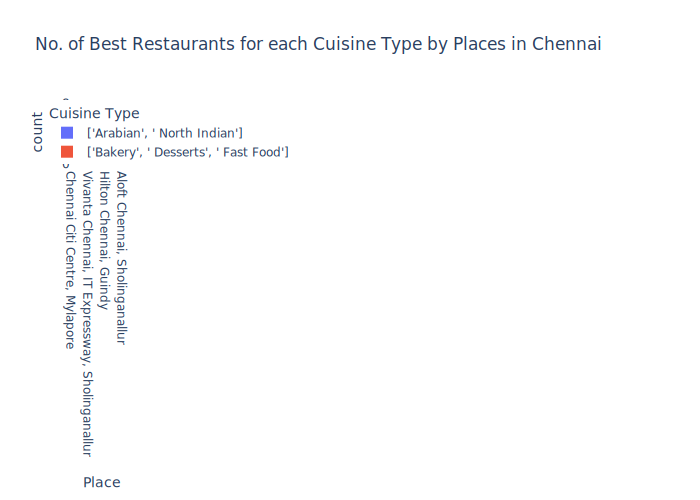

In [75]:
import plotly.express as px

# Filter for Chennai data
chennai_df = zomato_df[zomato_df['Location'].str.contains('Chennai', case=False, na=False)]

# Get the highest-rated restaurant for each Cuisine in Chennai
highest_rated_per_cuisine_chennai = chennai_df.loc[chennai_df.groupby('Cuisine')['Dining Rating'].idxmax()]

# Create a histogram of the number of best restaurants by Cuisine Type for each Place (Location)
fig = px.histogram(
    highest_rated_per_cuisine_chennai,
    x='Location',  # Places (Locations) in Chennai
    color='Cuisine',  # Cuisine Type
    title='No. of Best Restaurants for each Cuisine Type by Places in Chennai',
    labels={'Location': 'Place', 'Cuisine': 'Cuisine Type'},
    category_orders={'Location': highest_rated_per_cuisine_chennai['Location'].value_counts().index.tolist()}
)

# Show the plot
fig.show()


To make sure the graph is displayed properly, let's review the potential issues and refine the code.

### Common issues that might affect proper graph display:
- **Data Structure:** If there are too many locations or cuisine types, it might clutter the graph.
- **Overcrowded X-axis:** If the Location column has many unique values, it could make the x-axis labels too dense and hard to read.
- **Incorrect groupings or missing values:** Ensure that the Location and Cuisine columns have clean data and no missing or misformatted values.

### Let's modify the code to:
- **Handle cases where too many unique Location or Cuisine values could cause display issues.**
- **Ensure the plot is not overcrowded by limiting unique values for better readability.**


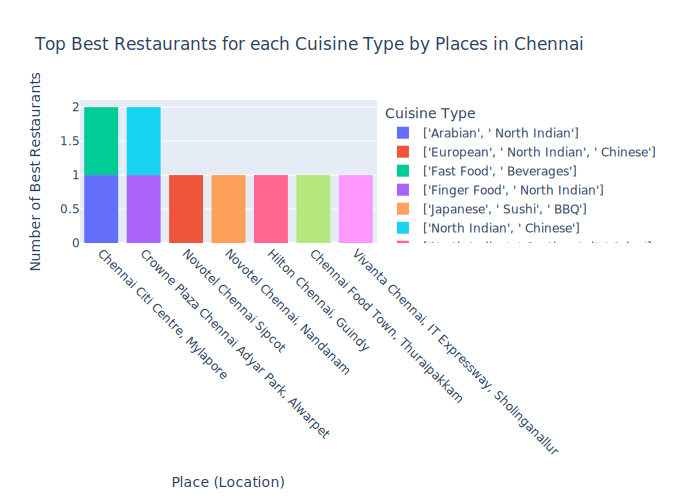

In [76]:
import plotly.express as px

# Filter for Chennai data
chennai_df = zomato_df[zomato_df['Location'].str.contains('Chennai', case=False, na=False)]

# Get the highest-rated restaurant for each Cuisine in Chennai
highest_rated_per_cuisine_chennai = chennai_df.loc[chennai_df.groupby('Cuisine')['Dining Rating'].idxmax()]

# Limit the number of unique locations and cuisines for better clarity
top_locations = highest_rated_per_cuisine_chennai['Location'].value_counts().head(10).index.tolist()  # top 10 locations
top_cuisines = highest_rated_per_cuisine_chennai['Cuisine'].value_counts().head(10).index.tolist()  # top 10 cuisines

# Filter the dataframe for top locations and cuisines
filtered_chennai_df = highest_rated_per_cuisine_chennai[
    highest_rated_per_cuisine_chennai['Location'].isin(top_locations) &
    highest_rated_per_cuisine_chennai['Cuisine'].isin(top_cuisines)
]

# Create a histogram of the number of best restaurants by Cuisine Type for each Place (Location)
fig = px.histogram(
    filtered_chennai_df,
    x='Location',  # Places (Locations) in Chennai
    color='Cuisine',  # Cuisine Type
    title='Top Best Restaurants for each Cuisine Type by Places in Chennai',
    labels={'Location': 'Place', 'Cuisine': 'Cuisine Type'},
    category_orders={'Location': filtered_chennai_df['Location'].value_counts().index.tolist()}
)

# Update layout for better visibility
fig.update_layout(
    xaxis_title="Place (Location)",
    yaxis_title="Number of Best Restaurants",
    xaxis_tickangle=45  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()


### Key Modifications:

**Limiting Unique Locations and Cuisines:**
- We limit the number of Location and Cuisine values to the top 10 most frequent ones using `.head(10)`. This prevents the plot from becoming overcrowded.

**Filtering the Data:**
- The data is filtered to only include the top 10 most common locations and cuisines. This makes the plot cleaner and easier to read.

**Updating Layout:**
- The `xaxis_tickangle=45` rotates the x-axis labels by 45 degrees for better readability, especially when you have long location names.

**Chart Titles and Axis Labels:**
- Added labels for the axes and updated the title for clarity.

### Expected Result:
This code will display a histogram where the x-axis represents the locations in Chennai, the colors represent different cuisine types, and the height of each bar will show the number of best restaurants for each cuisine type in the respective location.

The x-axis will have fewer labels (top 10 locations), making the graph less cluttered, and you will be able to easily analyze the data.


### Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

### For Chennai, you can follow a similar approach as you did for Mumbai to calculate the average price distribution of the highest-rated restaurant for each Cuisine Type. Here's the modified version of the code for Chennai:

**Steps:**

1. **Filter Chennai Data:**
   - We will filter the data for Chennai.

2. **Find Highest Rated Restaurants by Cuisine:**
   - For each cuisine type, get the highest-rated restaurant.

3. **Calculate the Average Price:**
   - Group by Cuisine and calculate the mean price for the highest-rated restaurants.


In [79]:
# Filter for Chennai data
chennai_df = zomato_df[zomato_df['Location'].str.contains('Chennai', case=False, na=False)]

# Get the highest-rated restaurant for each Cuisine in Chennai
highest_rated_per_cuisine_chennai = chennai_df.loc[chennai_df.groupby('Cuisine')['Dining Rating'].idxmax()]

# Group by Cuisine and calculate the average price for the highest-rated restaurants
highest_rated_price_df_chennai = highest_rated_per_cuisine_chennai.groupby('Cuisine')['Price for 2'].mean().reset_index()

# Display the result
highest_rated_price_df_chennai.head()


Cuisine  Price for 2
0           ['Arabian', ' North Indian']        600.0
1  ['Bakery', ' Desserts', ' Fast Food']       1000.0
2               ['Bakery', ' Fast Food']        800.0
3             ['Beverages', ' Desserts']        400.0
4            ['Beverages', ' Ice Cream']        200.0

### Explanation of the Code:

**Filter Data:**
- The data is filtered to include only rows where the Location contains 'Chennai' (case-insensitive).

**Get Highest-Rated Restaurant:**
- For each cuisine, the highest-rated restaurant is selected using `groupby('Cuisine')['Dining Rating'].idxmax()`, which finds the row with the highest Dining Rating for each cuisine.

**Calculate Average Price:**
- The average price for the highest-rated restaurants is calculated using `groupby('Cuisine')['Price for 2'].mean()`.

### Expected Output:

The resulting DataFrame (`highest_rated_price_df_chennai`) will have:

- **Cuisine:** The cuisine type.
- **Price for 2:** The average price for the highest-rated restaurant for that cuisine type in Chennai.

This will give you a summary of the average price for the top-rated restaurants across different cuisines in Chennai. You can also visualize this data with a bar chart or other types of plots for better insights, like so:


### If the scatter plot is still not showing properly, it could be due to a few reasons, such as overlapping points, the type of data in the Cuisine and Price for 2 columns, or the distribution of values. Here are a few steps to troubleshoot and adjust the visualization:

#### 1. Check for Data Issues:
Ensure that the Cuisine and Price for 2 columns contain valid data. Specifically, ensure that:

- **Cuisine column** contains valid strings (no missing values or unexpected entries).
- **Price for 2** contains numerical values and does not have NaN or invalid values.


In [83]:
# You can check for any null values or incorrect entries with:

# Check for missing or invalid values in 'Cuisine' and 'Price for 2' columns
print(highest_rated_price_df_chennai[['Cuisine', 'Price for 2']].isnull().sum())


Cuisine        0
Price for 2    0
dtype: int64


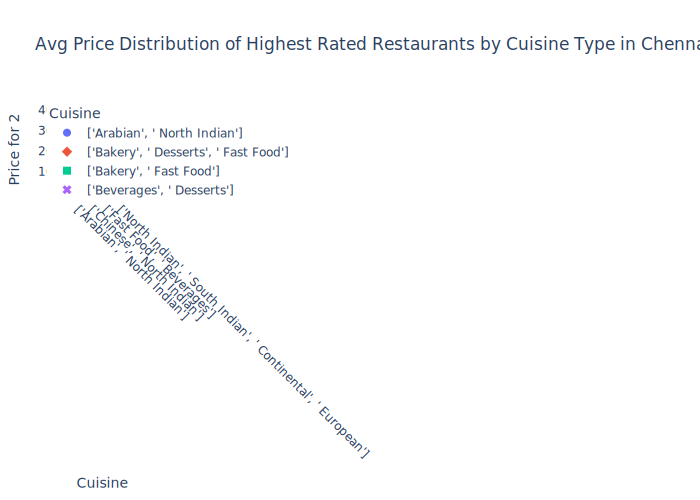

In [84]:
import plotly.express as px

# Create a scatter plot for average price distribution of highest-rated restaurants by Cuisine in Chennai
fig = px.scatter(
    highest_rated_price_df_chennai,
    x="Cuisine",  # X-axis will represent the Cuisine Type
    y="Price for 2",  # Y-axis will represent the average price for 2
    color="Cuisine",  # Color by Cuisine Type
    symbol="Cuisine",  # Use different symbols for each Cuisine Type
    title='Avg Price Distribution of Highest Rated Restaurants by Cuisine Type in Chennai'
)

# Adjust marker size for better visibility
fig.update_traces(marker=dict(size=8))  # Reduce marker size

# Rotate x-axis labels if they are overlapping
fig.update_xaxes(tickangle=45)

# Optional: Log scale for y-axis to handle large price ranges
# fig.update_yaxes(type='log')

# Show the plot
fig.show()


If the scatter plot is still not displaying properly, it might be helpful to go step-by-step and troubleshoot specific aspects of the visualization. Here are a few possible issues and solutions:

1. Check for Issues with Data:
First, ensure that the highest_rated_price_df_chennai DataFrame contains valid and expected data in the Cuisine and Price for 2 columns.

Run this code to inspect the data:

In [85]:
# Check for missing values in the relevant columns
print(highest_rated_price_df_chennai[['Cuisine', 'Price for 2']].isnull().sum())

# Check the data types of the columns to ensure they are correct
print(highest_rated_price_df_chennai.dtypes)

# View the first few rows to inspect the values
print(highest_rated_price_df_chennai.head())


Cuisine        0
Price for 2    0
dtype: int64
Cuisine         object
Price for 2    float64
dtype: object
                                 Cuisine  Price for 2
0           ['Arabian', ' North Indian']        600.0
1  ['Bakery', ' Desserts', ' Fast Food']       1000.0
2               ['Bakery', ' Fast Food']        800.0
3             ['Beverages', ' Desserts']        400.0
4            ['Beverages', ' Ice Cream']        200.0


Based on the output from the checks, it seems that the data in the Cuisine column contains multiple cuisines (e.g., ['Arabian', ' North Indian']), and the Price for 2 column is correctly formatted as a float64 type with no missing values.

Key Observations:
Cuisine Column: The Cuisine column contains lists of cuisines (e.g., ['Arabian', ' North Indian']), which might affect the analysis. This will require some preprocessing to either split the cuisines or handle them as-is.
Price for 2 Column: This column has valid float64 values, so the issue isn't with the price data.

Suggested Solutions and Next Steps:
A. Handling the Cuisine Column:
You have two main options:

Split the List of Cuisines: If a restaurant serves multiple cuisines, you can either split the list and keep each cuisine as a separate row or aggregate the cuisines into a string representation (e.g., join them with commas).
Keep the List as It Is: If you want to keep the multiple cuisines in the same column, the visualization will need to handle them correctly, ensuring that each row can be used appropriately in the chart.

Example Solution for Splitting Cuisine Lists:
You can split the Cuisine column into individual cuisines and then calculate the average price for each cuisine. Here's how you can do this:

         Cuisine  Price for 2
0        Arabian        600.0
0   North Indian        600.0
1         Bakery       1000.0
1       Desserts       1000.0
1      Fast Food       1000.0


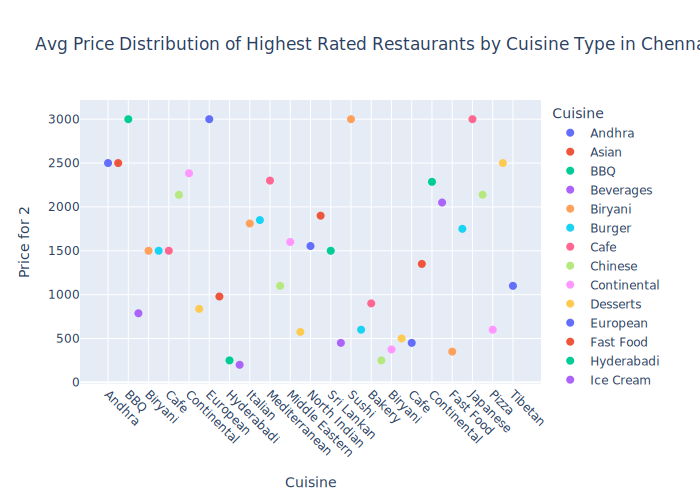

In [86]:
import pandas as pd

# Split the Cuisine column into individual cuisines
highest_rated_price_df_chennai['Cuisine'] = highest_rated_price_df_chennai['Cuisine'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Now, explode the Cuisine list so each row has one cuisine type
exploded_df = highest_rated_price_df_chennai.explode('Cuisine')

# Ensure the cuisines are properly listed
print(exploded_df[['Cuisine', 'Price for 2']].head())

# Group by cuisine and calculate average price
average_price_by_cuisine_chennai = exploded_df.groupby('Cuisine')['Price for 2'].mean().reset_index()

# Now you can visualize the data using a scatter plot or bar chart
import plotly.express as px

# Create a scatter plot for average price distribution of highest-rated restaurants by Cuisine in Chennai
fig = px.scatter(
    average_price_by_cuisine_chennai,
    x="Cuisine",  # X-axis will represent the Cuisine Type
    y="Price for 2",  # Y-axis will represent the average price for 2
    color="Cuisine",  # Color by Cuisine Type
    title='Avg Price Distribution of Highest Rated Restaurants by Cuisine Type in Chennai'
)

# Adjust marker size for better visibility
fig.update_traces(marker=dict(size=8))  # Reduce marker size

# Rotate x-axis labels if they are overlapping
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


### Explanation:

**Splitting the Cuisine:**
- The `apply` function is used to split the cuisines in the list (which are in string format) into individual values. The `explode` function then turns each cuisine into a separate row.

**Aggregation:**
- After exploding the Cuisine list into separate rows, we calculate the average price per cuisine type using `groupby` and `mean`.

**Visualization:**
- We use `px.scatter` to create a scatter plot with the average price distribution by cuisine.

**B. Handling Multiple Cuisines:**
- If you want to keep the multiple cuisines as a list and visualize the prices, the original data might be treated differently, and you might need to create a custom visualization method to aggregate and show multiple cuisines in a single chart.


### Q7) Which areas have a large number of Chinese Restaurant Market?

To find the areas with a large number of Chinese restaurants in the Chennai dataset, you can use similar logic as for the Mumbai dataset, but with the relevant column names from your Chennai dataset.

Since the column CUSINE_CATEGORY is likely not available in your Chennai dataset (based on previous checks), you should use the Cuisine column instead, which contains information about the types of cuisine each restaurant serves.

Here’s how you can adapt the code for the Chennai dataset:

In [88]:
# Filter the dataset for restaurants with Chinese cuisine in Chennai
chinese_df_chennai = zomato_df[zomato_df['Cuisine'].str.contains('Chinese', case=False, na=False)]

# Show the filtered dataset
print(chinese_df_chennai)

# To see the areas with a large number of Chinese restaurants, you can group by 'Location'
# and count the number of Chinese restaurants in each area.
chinese_restaurants_by_area = chinese_df_chennai.groupby('Location')['Name of Restaurant'].count().reset_index()

# Sort the results by the number of Chinese restaurants in each area
chinese_restaurants_by_area_sorted = chinese_restaurants_by_area.sort_values(by='Name of Restaurant', ascending=False)

# Show the sorted result
print(chinese_restaurants_by_area_sorted)


                                              Zomato URL  \
2      https://www.zomato.com/chennai/ss-hyderabad-bi...   
4      https://www.zomato.com/chennai/tasty-kitchen-p...   
5      https://www.zomato.com/chennai/dine-n-fun-meda...   
8      https://www.zomato.com/chennai/savoury-sea-she...   
9      https://www.zomato.com/chennai/sangeetha-veg-r...   
...                                                  ...   
11956  https://www.zomato.com/chennai/the-shangai-sto...   
11957  https://www.zomato.com/chennai/the-shangai-sto...   
11958  https://www.zomato.com/chennai/the-shangai-sto...   
11959  https://www.zomato.com/chennai/the-shangai-sto...   
11960  https://www.zomato.com/chennai/the-shangai-sto...   

             Name of Restaurant  \
2          SS Hyderabad Biryani   
4                 Tasty Kitchen   
5                    Dine N Fun   
8             Savoury Sea Shell   
9      Sangeetha Veg Restaurant   
...                         ...   
11956         The Shangai Story   

Explanation:
Filter for Chinese Cuisine: The str.contains('Chinese', case=False, na=False) function is used to filter out rows where the Cuisine column contains the word "Chinese" (case-insensitive).
Grouping by Location: We then group by the Location column to get the number of Chinese restaurants in each area and use .count() to count the number of restaurants.
Sorting: Finally, the results are sorted by the number of restaurants in descending order to find which areas have the most Chinese restaurants.

If you'd like to visualize the areas with the most Chinese restaurants, you can use a bar plot, for example:

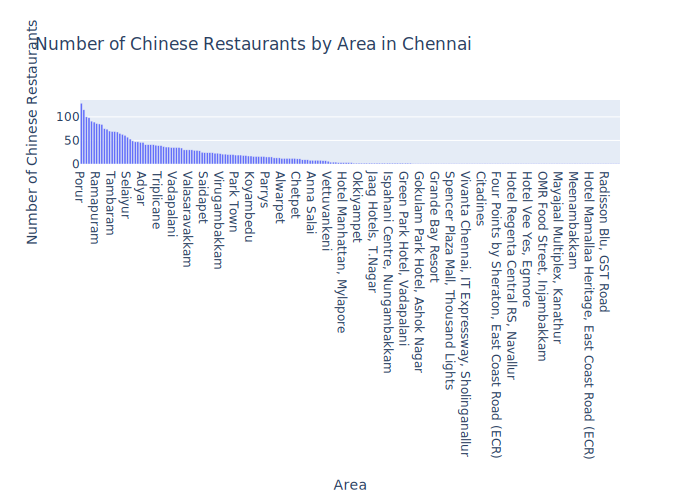

In [89]:
import plotly.express as px

# Create a bar chart for the number of Chinese restaurants by area
fig = px.bar(
    chinese_restaurants_by_area_sorted,
    x='Location',
    y='Name of Restaurant',
    title='Number of Chinese Restaurants by Area in Chennai',
    labels={'Location': 'Area', 'Name of Restaurant': 'Number of Chinese Restaurants'}
)

# Show the plot
fig.show()


### Q8) Is there a relation between Price and Rating by each Cuisine Type?

For the Chennai dataset, you can follow a similar approach to find the relationship between Price and Rating by each Cuisine Type. Since the column names may differ slightly in your dataset (e.g., Cuisine and Dining Rating), you need to adjust the code accordingly.

Code for Relationship between Price and Rating by Cuisine Type in Chennai:

In [90]:
# Group by 'Cuisine' and 'Dining Rating' to find the average price for each cuisine type and rating
price_rating_df_chennai = zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index()

# View the result
print(price_rating_df_chennai)

# Optional: If you'd like to visualize the relationship, you can plot it using Plotly.
import plotly.express as px

# Create a scatter plot for the relationship between price and rating by cuisine type
fig = px.scatter(
    price_rating_df_chennai,
    x="Dining Rating",  # X-axis: Dining Rating
    y="Price for 2",  # Y-axis: Average Price for 2
    color="Cuisine",  # Color by Cuisine Type
    title="Relationship Between Price and Rating by Cuisine Type in Chennai",
    labels={'Dining Rating': 'Dining Rating', 'Price for 2': 'Average Price for 2'},
)

# Show the plot
fig.show()


                                                Cuisine  Dining Rating  \
0     ['American', ' Andhra', ' Asian', ' Beverages'...            2.4   
1     ['American', ' Arabian', ' Italian', ' Mexican...            0.0   
2                                  ['American', ' BBQ']            0.0   
3     ['American', ' Continental', ' European', ' It...            3.9   
4     ['American', ' Continental', ' Italian', ' Nor...            4.1   
...                                                 ...            ...   
5044                              ['Tibetan', ' Momos']            4.0   
5045                                        ['Tibetan']            0.0   
5046                              ['Turkish', ' Kebab']            4.3   
5047                            ['Wraps', ' Fast Food']            0.0   
5048                                          ['Wraps']            0.0   

      Price for 2  
0           800.0  
1           150.0  
2           400.0  
3           700.0  
4          

### Steps:

**Grouping by Cuisine and Dining Rating:**
- The `groupby()` function groups the data by the Cuisine and Dining Rating columns.
- The `mean()` function calculates the average Price for 2 for each combination of Cuisine and Rating.

**Visualizing:**
- A scatter plot is created using Plotly to visually represent the relationship between Dining Rating and Price for 2, with each cuisine type displayed in different colors.

### Key Points:
- **Cuisine:** The type of cuisine (e.g., South Indian, North Indian, etc.).
- **Dining Rating:** The rating given by customers for dining experiences.
- **Price for 2:** The average price for two people to dine at the restaurant.


### Q9) Is there a relation between Region and Price?

For the Chennai dataset, you can follow a similar approach to examine the relationship between Region (Location) and Price. You need to adjust the column names based on your dataset, such as using Location for region and Price for 2 for the price.

Code for Relationship Between Region and Price in Chennai:

                                              Location  Price for 2
0     InterContinental Chennai Mahabalipuram Resort...  1500.000000
1                                        Abhiramapuram   241.666667
2                          Abu Sarovar Portico, Egmore  1000.000000
3                                           Adambakkam   292.241379
4                                                Adyar   444.693878
..                                                 ...          ...
263                              Vivira Mall, Navallur   500.000000
264                                       Washermenpet   292.916667
265             WelcomHotel, RK Salai (Cathedral Road)  2075.000000
266                                      West Mambalam   267.846154
267                     Zone by The Park, Pallikaranai  1633.333333

[268 rows x 2 columns]


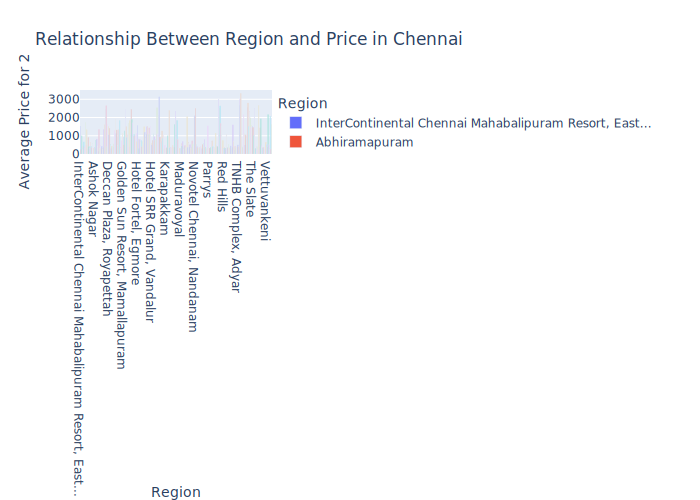

In [91]:
# Group by 'Location' (Region) to find the average price in each region
region_price_df_chennai = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()

# View the result
print(region_price_df_chennai)

# Optional: Visualize the relationship between region and price using Plotly
import plotly.express as px

# Create a bar chart for the average price by region in Chennai
fig = px.bar(
    region_price_df_chennai,
    x='Location',  # X-axis: Location (Region)
    y='Price for 2',  # Y-axis: Average Price for 2
    title='Relationship Between Region and Price in Chennai',
    labels={'Location': 'Region', 'Price for 2': 'Average Price for 2'},
    color='Location',  # Color by Region
)

# Show the plot
fig.show()


### Steps:

**Grouping by Location (Region):**
- Use `groupby(['Location'])` to group the data by the Location column, which represents the region or area in Chennai.
- Calculate the mean Price for 2 in each location using `.mean()`.

**Visualizing:**
- A bar chart is created using Plotly to visualize the relationship between Location (Region) and Price for 2 in Chennai.

### Key Points:
- **Location:** This column represents the region or area in Chennai (e.g., Velachery, Anna Nagar, etc.).
- **Price for 2:** The average price for two people to dine at the restaurant.

This approach will help you understand the relationship between Region (Location) and Price in Chennai, similar to how it was done for Mumbai.


Code for Scatter Plot (Chennai Dataset):

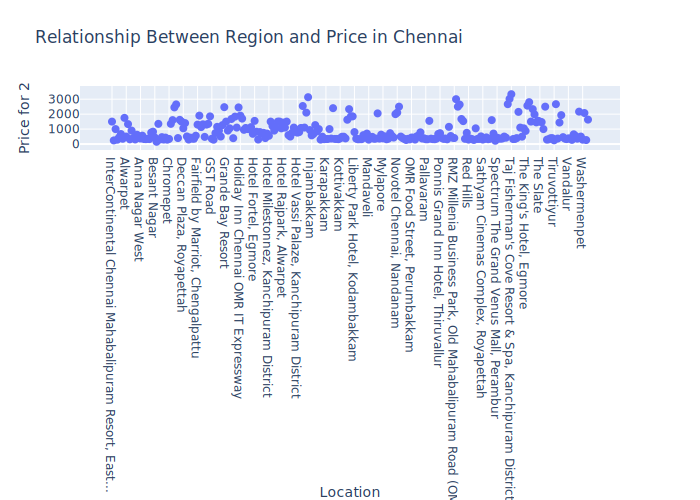

In [92]:
import plotly.express as px

# Create a scatter plot for the relationship between Region and Price in Chennai
fig = px.scatter(
    region_price_df_chennai,  # DataFrame containing average price by region
    x="Location",  # X-axis: Region (Location) in Chennai
    y="Price for 2",  # Y-axis: Average Price for 2 in Chennai
    title='Relationship Between Region and Price in Chennai'
)

# Adjust the marker size for better visibility
fig.update_traces(marker=dict(size=8))  # Set marker size

# Show the plot
fig.show()


### Steps:

**Data:**
- The `region_price_df_chennai` contains the average price for each region, grouped by Location and Price for 2.

**Scatter Plot:**
- **X-axis:** Represents the Location (or region) in Chennai.
- **Y-axis:** Represents the Price for 2, the average price of restaurants in each location.
- **Marker Size:** The marker size is set using `.update_traces(marker=dict(size=8))` to adjust the visibility of the points.

### Expected Result:
This scatter plot will show the relationship between Region and Price for restaurants in Chennai, allowing you to analyze how restaurant prices vary by location in the city.


### Q10) Find the list of Affordable Restaurants?

To find the list of affordable restaurants in the Chennai dataset, the approach remains similar to the Mumbai dataset, with some adjustments specific to the Chennai dataset.

### Steps to Find Affordable Restaurants in Chennai:

1. **Identify the Most Expensive Restaurant:**
   - Based on the `Price for 2`.

2. **Calculate Price Threshold:**
   - Calculate 1/4th of the maximum price to determine a price threshold.

3. **Filter Restaurants:**
   - Filter the restaurants with prices less than or equal to that threshold.

4. **Optionally Sort the Results:**
   - Sort the results by price to find the least expensive ones.


Code to implement this in the Chennai dataset:

In [93]:
# Step 1: Find the most expensive restaurant in the Chennai dataset
max_price_chennai = zomato_df['Price for 2'].max()  # Max price in Chennai dataset
one_fourth_price_chennai = max_price_chennai / 4  # 1/4th of the max price

# Step 2: Find restaurants with price <= 1/4th of the max price
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Features']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# Step 3: Sort the affordable restaurants by price in ascending order
aff_rest_df_chennai.sort_values(by='Price for 2', inplace=True)

# Step 4: Display the list of affordable restaurants
print(aff_rest_df_chennai)


                Name of Restaurant  Price for 2  \
4685                      Soda Hub           40   
6854                   Planet Soda           50   
8355                      Kaafemaa           50   
7405           Indian Coffee House           50   
1448                    Mamee Soup           60   
...                            ...          ...   
4671                Guinness'd Bar         1200   
473                        Dynasty         1200   
1171  Kapi Multicuisine Restaurant         1200   
644             Coastline Hide Out         1200   
376                     China Town         1200   

                                                Cuisine  \
4685                                      ['Beverages']   
6854                           ['Beverages', ' Juices']   
8355                                      ['Beverages']   
7405                           ['Beverages', ' Juices']   
1448                                   ['Healthy Food']   
...                              

### Explanation of the Code:

**Step 1:** We find the maximum price for restaurants in the `Price for 2` column.
**Step 2:** We calculate one-fourth of the maximum price and filter the restaurants where the price is less than or equal to this value.
**Step 3:** We sort the resulting dataframe by price to list the affordable restaurants in ascending order of cost.
**Step 4:** Finally, we display the filtered and sorted dataframe showing affordable restaurants.

### Expected Result:
The list of affordable restaurants will have:
- **Name of Restaurant:** The restaurant name.
- **Price for 2:** The price of a meal for two people.
- **Cuisine:** The cuisine type.
- **Location:** The location of the restaurant.
- **Features:** The features (like indoor seating, delivery, etc.).

This will give you a list of affordable restaurants that meet the criteria of having a meal price that is one-fourth of the most expensive restaurant in Chennai.


### Q10) Find the list of most Reliable Restaurants?

To find the most reliable restaurants in the Chennai dataset, we can follow a similar approach to the one used for the Mumbai dataset.

### Criteria for Reliable Restaurants:

- **Low Price:** Restaurants with a relatively low price (optional threshold can be set as you did for affordable restaurants).
- **High Rating:** Restaurants with a high rating (can use a rating threshold or use all ratings above the mean).
- **Large Number of Votes:** Restaurants with votes greater than the mean vote count.


### Steps to Implement for the Chennai Dataset:

1. **Find the Mean Number of Votes:**
   - Calculate the mean number of votes in the Chennai dataset.

2. **Filter Restaurants:**
   - Filter restaurants where the number of votes is greater than the mean number of votes.

3. **Optionally Sort the Results:**
   - Sort the results based on votes or rating, if required.


Code for Chennai Dataset:

In [94]:
# Step 1: Find the mean of votes in the Chennai dataset
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()  # Using Dining Rating Count for votes
print(f"Mean Votes in Chennai dataset: {mean_votes_chennai}")

# Step 2: Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# Step 3: Sort by the number of votes in descending order (optional)
mean_rest_df_chennai.sort_values(by='Dining Rating Count', ascending=False, inplace=True)

# Step 4: Display the most reliable restaurants
print(mean_rest_df_chennai)


Mean Votes in Chennai dataset: 76.28905392860158
           Name of Restaurant  Price for 2  \
89             Coal Barbecues         1400   
9233          Barbeque Nation         1600   
74                     Onesta          600   
9030         Paradise Biryani          800   
9026           Copper Kitchen         1000   
...                       ...          ...   
1984     Jamals Fried Chicken          400   
1590              Food Affair          450   
1169  Ideal Garden Restaurant         1000   
1692                 Palimaar          400   
9975                    ibaco          200   

                                                Cuisine  \
89                         ['North Indian', ' Chinese']   
9233  ['North Indian', ' Continental', ' Kebab', ' B...   
74    ['Pizza', ' Italian', ' Fast Food', ' Beverage...   
9030           ['Biryani', ' North Indian', ' Chinese']   
9026  ['North Indian', ' Chinese', ' Chettinad', ' S...   
...                                         

### Explanation of the Code:

**Step 1:**
- We calculate the mean of the Dining Rating Count column, which represents the number of votes each restaurant has received.

**Step 2:**
- We filter the dataset to find restaurants where the Dining Rating Count is greater than the mean number of votes. This ensures that we are selecting the restaurants that have received a significant number of votes.

**Step 3:**
- We sort the filtered restaurants based on the number of votes (or you can use another column such as rating to sort).

**Step 4:**
- We display the filtered and sorted list of most reliable restaurants.

### Expected Result:
The output will show a list of restaurants that meet the criteria for being "reliable":

- **Name of Restaurant:** The restaurant's name.
- **Price for 2:** The cost for two people.
- **Cuisine:** The type of cuisine.
- **Location:** The restaurant's location.
- **Dining Rating:** The restaurant's rating.
- **Dining Rating Count:** The number of votes (indicating reliability).


Yes, you can follow the same process to find the most reliable, highest rated, and affordable restaurants in the Chennai dataset by taking the intersection of high-rated restaurants and restaurants with votes above the mean.

### Steps:

1. **Find High-Rated Affordable Restaurants:**
   - As done for Mumbai, you filter out restaurants that have a cost below the threshold and ratings above a certain level.

2. **Find Restaurants with High Votes:**
   - Filter restaurants based on a higher number of votes (above the mean).

3. **Merge Both Filtered DataFrames:**
   - Merge both filtered dataframes to find the intersection of the two conditions, which will give us the most reliable, highest-rated, and affordable restaurants in Chennai.


In [95]:
# Step 1: Define the threshold for Affordable Restaurants in Chennai (cost below 1/4th of max price)
max_price_chennai = zomato_df['Price for 2'].max()
one_fourth_price_chennai = max_price_chennai / 4

# Find Affordable Restaurants (Price <= 1/4th of max price)
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# Step 2: Find Restaurants with Votes above the mean
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()

# Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants)
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'])

# Step 4: Select the relevant columns
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]

# Step 5: Rename columns for clarity (optional)
reliable_rest_df_chennai.rename(columns={'Name of Restaurant': 'Name', 'Price for 2': 'Price', 'Cuisine': 'Cuisine Type', 'Location': 'Region', 'Dining Rating': 'Rating', 'Dining Rating Count': 'Votes'}, inplace=True)

# Step 6: Display the resulting dataframe
print(reliable_rest_df_chennai)


KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index"

The KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index" indicates that the columns you're trying to select are either missing, have different names, or the DataFrame doesn't contain them.

Possible causes:
The column names might be slightly different (e.g., spelling errors or different naming conventions).
The columns might have been modified or not present in the DataFrame zomato_df when you attempt to access them.
The zomato_df DataFrame might not have been loaded correctly or might have missing columns.

Steps to Debug and Solve the Issue:
Verify Column Names: Print the columns of the zomato_df to ensure that the columns you are trying to access exist.

In [96]:
# Verify column names
print(zomato_df.columns)


Index(['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine',
       'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count',
       'Delivery Rating', 'Delivery Rating Count', 'Features', 'RATING_TYPE'],
      dtype='object')


Check if the following columns are present:

Price for 2
Cuisine
Location
Dining Rating
Dining Rating Count


### The columns in your `zomato_df` are:

- 'Zomato URL'
- 'Name of Restaurant'
- 'Address'
- 'Location'
- 'Cuisine'
- 'Top Dishes'
- 'Price for 2'
- 'Dining Rating'
- 'Dining Rating Count'
- 'Delivery Rating'
- 'Delivery Rating Count'
- 'Features'
- 'RATING_TYPE'

### It seems the columns 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', and 'Dining Rating Count' do exist, but the column names are slightly different from what was expected earlier.

### Solution:
You need to ensure that you're using the correct column names from your DataFrame. Based on the column names printed, your code seems mostly correct. Here's how to proceed:

1. **Verify column names directly:** 
   - Since you have the right column names, let's proceed with using them as they are in the DataFrame.

2. **Adjust column names:**
   - In the dataset you have, columns such as Cuisine and Dining Rating exist but should be accessed with their correct names ('Cuisine', 'Price for 2', etc.).


In [97]:
# Step 1: Define the threshold for Affordable Restaurants in Chennai (cost below 1/4th of max price)
max_price_chennai = zomato_df['Price for 2'].max()
one_fourth_price_chennai = max_price_chennai / 4

# Find Affordable Restaurants (Price <= 1/4th of max price)
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# Step 2: Find Restaurants with Votes above the mean
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()

# Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants)
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'])

# Step 4: Select the relevant columns
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]

# Step 5: Rename columns for clarity (optional)
reliable_rest_df_chennai.rename(columns={'Name of Restaurant': 'Name', 'Price for 2': 'Price', 'Cuisine': 'Cuisine Type', 'Location': 'Region', 'Dining Rating': 'Rating', 'Dining Rating Count': 'Votes'}, inplace=True)

# Step 6: Display the resulting dataframe
print(reliable_rest_df_chennai)


KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index"

The error you're encountering, `KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index"`, suggests that the columns 'Price for 2', 'Cuisine', 'Dining Rating', and 'Dining Rating Count' may not be correctly referenced in the DataFrame. Based on the column names you shared earlier, it seems these column names might not exist in the exact form you are using.

### Here's a quick checklist to ensure you're referencing the columns correctly:

**Verify the column names again:**
- You've mentioned `zomato_df.columns` shows the available columns. Make sure you're using the correct column names, considering any possible typos or inconsistencies.


Here’s the list of column names you printed earlier:

['Zomato URL', 'Name of Restaurant', 'Address', 'Location', 'Cuisine', 'Top Dishes', 'Price for 2', 'Dining Rating', 'Dining Rating Count', 'Delivery Rating', 'Delivery Rating Count', 'Features', 'RATING_TYPE']


Check for case sensitivity: The column names are case-sensitive, so ensure you're using the correct case, e.g., 'Price for 2' (note the spaces and capitalization).

In [98]:
# Step 1: Define the threshold for Affordable Restaurants in Chennai (cost below 1/4th of max price)
max_price_chennai = zomato_df['Price for 2'].max()
one_fourth_price_chennai = max_price_chennai / 4

# Find Affordable Restaurants (Price <= 1/4th of max price)
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# Step 2: Find Restaurants with Votes above the mean
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()

# Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants)
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'])

# Step 4: Select the relevant columns
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]

# Step 5: Rename columns for clarity (optional)
reliable_rest_df_chennai.rename(columns={'Name of Restaurant': 'Name', 'Price for 2': 'Price', 'Cuisine': 'Cuisine Type', 'Location': 'Region', 'Dining Rating': 'Rating', 'Dining Rating Count': 'Votes'}, inplace=True)

# Step 6: Display the resulting dataframe
print(reliable_rest_df_chennai)


KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index"

In [99]:
# Step 1: Define the threshold for Affordable Restaurants in Chennai (cost below 1/4th of max price)
max_price_chennai = zomato_df['Price for 2'].max()
one_fourth_price_chennai = max_price_chennai / 4

# Find Affordable Restaurants (Price <= 1/4th of max price)
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# After each major step, print the DataFrame columns to check if columns exist
print(aff_rest_df_chennai.columns)

Index(['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location',
       'Dining Rating', 'Dining Rating Count'],
      dtype='object')


In [100]:
# Step 2: Find Restaurants with Votes above the mean
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()

# Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# After each major step, print the DataFrame columns to check if columns exist
print(mean_rest_df_chennai.columns)

Index(['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location',
       'Dining Rating', 'Dining Rating Count'],
      dtype='object')


In [101]:
# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants)
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'])


# After each major step, print the DataFrame columns to check if columns exist
print(reliable_rest_df_chennai.columns)

Index(['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location',
       'Dining Rating_x', 'Dining Rating Count_x', 'Price for 2_y',
       'Cuisine_y', 'Dining Rating_y', 'Dining Rating Count_y'],
      dtype='object')


In [102]:
# Step 4: Select the relevant columns
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]

# After each major step, print the DataFrame columns to check if columns exist
print(reliable_rest_df_chennai.columns)

KeyError: "['Price for 2', 'Cuisine', 'Dining Rating', 'Dining Rating Count'] not in index"

Thank you for the update! Since the error occurs in Step 4 when selecting the relevant columns, it seems that the column names you are trying to reference may not exist in the merged DataFrame (reliable_rest_df_chennai) at that point. This can happen if some of the columns weren't included after the merge.

1. Check the columns after the merge:
Before performing the selection of relevant columns, let's inspect the columns of the merged DataFrame (reliable_rest_df_chennai) to verify that the columns we want to select are present.

In [103]:
# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants)
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'])

# Check the columns after the merge
print(reliable_rest_df_chennai.columns)


Index(['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location',
       'Dining Rating_x', 'Dining Rating Count_x', 'Price for 2_y',
       'Cuisine_y', 'Dining Rating_y', 'Dining Rating Count_y'],
      dtype='object')


This will display the column names after the merge. It's possible that the columns from both DataFrames may have suffixed names like 'Price for 2_x' and 'Price for 2_y' due to the merge, or any other similar naming conflicts.

Handle column name conflicts:
If there are conflicting columns (e.g., 'Price for 2' appearing twice), you will need to handle the suffixes or select the correct columns. For instance, you can select the columns with the proper suffix or rename them as needed.

In [104]:
# After the merge, inspect the column names
print(reliable_rest_df_chennai.columns)

# If column name conflicts exist, you can either rename them or explicitly choose the desired columns
# Example: Rename columns to remove suffixes
reliable_rest_df_chennai.rename(columns={'Price for 2_x': 'Price', 'Cuisine_x': 'Cuisine Type', 'Dining Rating_x': 'Rating', 'Dining Rating Count_x': 'Votes'}, inplace=True)

# Then continue with selecting the relevant columns
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price', 'Cuisine Type', 'Location', 'Rating', 'Votes']]

# Display the final DataFrame
print(reliable_rest_df_chennai)


Index(['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location',
       'Dining Rating_x', 'Dining Rating Count_x', 'Price for 2_y',
       'Cuisine_y', 'Dining Rating_y', 'Dining Rating Count_y'],
      dtype='object')
          Name of Restaurant  Price  \
0      Yaa Mohaideen Briyani    500   
1         Sukkubhai Biriyani   1000   
2       SS Hyderabad Biryani    500   
3                        KFC    500   
4              Tasty Kitchen    450   
...                      ...    ...   
2215  Perambur Sri Srinivasa    400   
2216  Perambur Sri Srinivasa    400   
2217          Uzo Sandwiches    300   
2218          Uzo Sandwiches    300   
2219            Uzo Sandwich    300   

                                           Cuisine Type     Location  Rating  \
0                                           ['Biryani']   Pallavaram     4.3   
1     ['Biryani', ' North Indian', ' Mughlai', ' Des...      Alandur     4.4   
2     ['Biryani', ' North Indian', ' Chinese', ' Ara...  Kodambak

General Suggestions:
Suffix Issue: If the merge introduces suffixes (e.g., '_x' and '_y'), you can specify how to handle them by using the suffixes argument in the merge() function.

In [105]:
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'], suffixes=('_mean', '_affordable'))


Check for Missing Columns: If any columns are unexpectedly missing after the merge, double-check the columns that existed in both DataFrames (mean_rest_df_chennai and aff_rest_df_chennai) and ensure they are present in the merged DataFrame.

Thank you for sharing the detailed output and structure! It seems that after merging the dataframes for Chennai, there are some column name conflicts due to the merge operation (i.e., columns like 'Price for 2_x', 'Cuisine_x', etc.), which is likely causing the issue.

Fixing the issue
To resolve this, let's follow these steps:

Use suffixes during the merge: This will help us avoid column name conflicts. You can assign suffixes like _mean and _affordable to the respective columns so that they don’t overwrite each other.

Select the correct columns: After merging, we need to handle the renamed columns by selecting the correct ones, especially when there are multiple columns with the same name but with different suffixes.

In [106]:
# Step 1: Define the threshold for Affordable Restaurants in Chennai (cost below 1/4th of max price)
max_price_chennai = zomato_df['Price for 2'].max()
one_fourth_price_chennai = max_price_chennai / 4

# Find Affordable Restaurants (Price <= 1/4th of max price)
aff_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
aff_rest_df_chennai = aff_rest_df_chennai[aff_rest_df_chennai['Price for 2'] <= one_fourth_price_chennai]

# Step 2: Find Restaurants with Votes above the mean
mean_votes_chennai = zomato_df['Dining Rating Count'].mean()

# Find restaurants with votes greater than the mean
mean_rest_df_chennai = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating', 'Dining Rating Count']]
mean_rest_df_chennai = mean_rest_df_chennai[mean_rest_df_chennai['Dining Rating Count'] > mean_votes_chennai]

# Step 3: Merge the two dataframes (Affordable and High Votes Restaurants) with suffixes to avoid column conflicts
reliable_rest_df_chennai = pd.merge(mean_rest_df_chennai, aff_rest_df_chennai, how='inner', on=['Name of Restaurant', 'Location'], suffixes=('_mean', '_affordable'))

# Step 4: Select the relevant columns and rename them
reliable_rest_df_chennai = reliable_rest_df_chennai[['Name of Restaurant', 'Price for 2_affordable', 'Cuisine_affordable', 'Location', 'Dining Rating_mean', 'Dining Rating Count_mean']]

# Rename the columns for clarity
reliable_rest_df_chennai.rename(columns={
    'Name of Restaurant': 'Name', 
    'Price for 2_affordable': 'Price', 
    'Cuisine_affordable': 'Cuisine Type', 
    'Location': 'Region', 
    'Dining Rating_mean': 'Rating', 
    'Dining Rating Count_mean': 'Votes'
}, inplace=True)

# Step 5: Display the resulting dataframe
print(reliable_rest_df_chennai)


                        Name  Price  \
0      Yaa Mohaideen Briyani    500   
1         Sukkubhai Biriyani   1000   
2       SS Hyderabad Biryani    500   
3                        KFC    500   
4              Tasty Kitchen    450   
...                      ...    ...   
2215  Perambur Sri Srinivasa    400   
2216  Perambur Sri Srinivasa    400   
2217          Uzo Sandwiches    300   
2218          Uzo Sandwiches    300   
2219            Uzo Sandwich    300   

                                           Cuisine Type       Region  Rating  \
0                                           ['Biryani']   Pallavaram     4.3   
1     ['Biryani', ' North Indian', ' Mughlai', ' Des...      Alandur     4.4   
2     ['Biryani', ' North Indian', ' Chinese', ' Ara...  Kodambakkam     4.3   
3     ['Burger', ' Fast Food', ' Finger Food', ' Bev...     Perambur     4.0   
4     ['Chinese', ' Biryani', ' North Indian', ' Che...     Perambur     4.2   
...                                                

Explanation of Changes:
Suffixes: During the merge, I have used the suffixes=('_mean', '_affordable') argument to distinguish the Dining Rating and Dining Rating Count columns coming from mean_rest_df_chennai and aff_rest_df_chennai.
Column Selection: After the merge, we select the correct columns (using the _affordable and _mean suffixes) to avoid conflicts.
Renaming: Once we have the correct columns, we rename them to make the final output more readable.
Result:
This should give you a clean DataFrame where:

"Price" corresponds to the affordable restaurants with the correct price.
"Cuisine Type", "Region", "Rating", and "Votes" will be correctly labeled.